In [1]:
print("Akshat Jain")

Akshat Jain


# Step-1: Data Pre-processing
## 1. Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
# Linear algebra
# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## 2. Importing the dataset using the pandas library

In [3]:
data = pd.read_csv("metaData.csv")
data.head().T

,0,1,2,3,4
status_id,246675545449582_1649696485147474,246675545449582_1649426988507757,246675545449582_1648730588577397,246675545449582_1648576705259452,246675545449582_1645700502213739
status_type,video,photo,video,photo,photo
status_published,4/22/2018 6:00,4/21/2018 22:45,4/21/2018 6:17,4/21/2018 2:29,4/18/2018 3:22
num_reactions,529,150,227,111,213
num_comments,512,0,236,0,0
num_shares,262,0,57,0,0
num_likes,432,150,204,111,204
num_loves,92,0,21,0,9
num_wows,3,0,1,0,0
num_hahas,1,0,1,0,0


In [4]:
data.shape

(7050, 16)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0
Column1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Handling the missing values

In [6]:
print('Handling missing values in the dataset:')
print(data.isnull().sum())

Handling missing values in the dataset:
status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


--> Adjustments to remove missing values

In [ ]:
data.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
data.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

## 4. Exploratory Data Analysis

<Axes: xlabel='status_type', ylabel='count'>

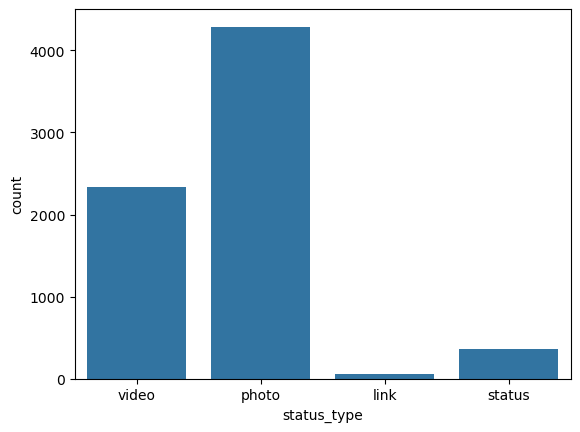

In [8]:
sns.countplot(x="status_type", data=data)

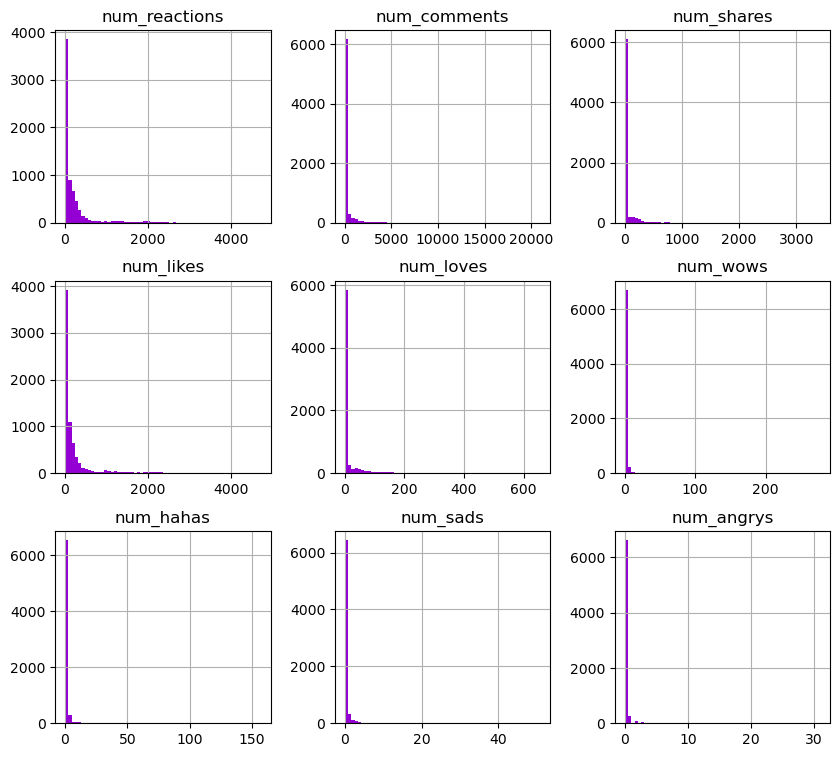

In [9]:
data.hist(bins=60, figsize=(10,9), color='darkviolet'); plt.show()

# Step-2: Adjusting additional variables

In [10]:
# Explore status_id variable
# view the Labels in the variable
data['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [11]:
# view how many different types of variables are there
len(data['status_id'].unique())

6997

In [13]:
# Explore status_published variable
# view the labels in the variable
data['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [14]:
# view how many different types of variables are there
len(data['status_published'].unique())

6913

In [15]:
data.drop(['status_id', 'status_published'], axis=1, inplace=True)
data.head(2)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0


# Step-3: Convert categorical variable into integers

In [16]:
le = LabelEncoder()
data['status_type'] = le.fit_transform(data['status_type'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


# Step-4: Extracting independent and dependent variables

In [17]:
X = data
y = data['status_type']

# Step-5: Feature Scaling

In [18]:
cols = X.columns
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=cols)
X.head(3)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0


# Step-6: KMeans Model with 4 clusters

In [19]:
classifier = KMeans(n_clusters=4, random_state=0)
classifier.fit(X)

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.

KMeans(n_clusters=4, random_state=0)

# Step-7: Predicting the Test Result

In [20]:
y_pred = classifier.predict(X)
y_pred

array([2, 1, 2, ..., 1, 1, 1], dtype=int32)

# Step-8: Test accuracy of the result

In [21]:
labels = classifier.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("Accuracy score: {0:0.2f}".format(correct_labels/float(y.size)))

Result: 4112 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


# Step-9: Finding the Accuracy of the model

In [22]:
accuracy = correct_labels/float(y.size)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 58.326241134751776 %


# Hence, the accuracy of the model is approximate 58%.